<a href="https://colab.research.google.com/github/anmolbadhan13/twitter_sentiment_analysis/blob/main/TWITTER_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
# printing stopwords in english
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Data loading

In [4]:

df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv', encoding='latin-1')


In [5]:
df.shape

(1599999, 6)

In [6]:
# print first five rows
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [7]:
# naming the columns
columns_names=['target','id','date','flag','user','tweet']
df = pd.read_csv('/content/drive/MyDrive/training.1600000.processed.noemoticon.csv',names=columns_names ,encoding='latin-1')


In [8]:
df.shape

(1600000, 6)

In [9]:
df.head()

,target,id,date,flag,user,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [10]:
df.isnull().sum() # checking missing values count

,0
target,0
id,0
date,0
flag,0
user,0
tweet,0


In [11]:
df['target'].value_counts()

,count
target,
0,800000
4,800000



target

0   :   800000

4  :    800000

data is balanced

convert target 4 to 1 for easy reading

In [12]:
df.replace({'target':{4:1}},inplace=True)

In [13]:
df['target'].value_counts()

,count
target,
0,800000
1,800000


0--> Negative Tweet

1--> Positive Tweet

**Stemming**

In [14]:
 ps=PorterStemmer()

In [15]:
def stem(content):

  stemmed_content=re.sub('[^a-zA-Z]',' ',content)
  stemmed_content=stemmed_content.lower()
  stemmed_content=stemmed_content.split()
  stemmed_content=[ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
  stemmed_content=' '.join(stemmed_content)

  return stemmed_content

In [16]:
df['tweet']=df['tweet'].apply(stem)

In [17]:
# from nltk.stem import WordNetLemmatizer


# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('omw-1.4')

# lemmatizer = WordNetLemmatizer()

# def lemmatize(content):
#     if isinstance(content, list):
#         content = ' '.join(content)

#     # Remove non-alphabetic characters
#     lemmatized_content = re.sub('[^a-zA-Z]', ' ', content)
#     # Convert to lowercase
#     lemmatized_content = lemmatized_content.lower()
#     # Split into words
#     lemmatized_content = lemmatized_content.split()
#     # Remove stopwords and apply lemmatization
#     lemmatized_content = [lemmatizer.lemmatize(word) for word in lemmatized_content if not word in stopwords.words('english')]
#     # Join words back into a single string
#     lemmatized_content = ' '.join(lemmatized_content)

#     return lemmatized_content


In [18]:
# df['tweet']=df['tweet'].apply(lemmatize)

In [19]:
# seperating target and label
X=df['tweet'].values
y=df['target'].values

In [20]:
print(X)

['switchfoot http twitpic com zl awww bummer shoulda got david carr third day'
 'upset updat facebook text might cri result school today also blah'
 'kenichan dive mani time ball manag save rest go bound' ...
 'readi mojo makeov ask detail'
 'happi th birthday boo alll time tupac amaru shakur'
 'happi charitytuesday thenspcc sparkschar speakinguph h']


In [21]:
print(y)

[0 0 0 ... 1 1 1]


Splitting the data into training and testing data

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [23]:
print(X.shape,X_train.shape,X_test.shape)

(1600000,) (1280000,) (320000,)


In [24]:
X_train

array(['watch saw iv drink lil wine', 'hatermagazin',
       'even though favourit drink think vodka coke wipe mind time think im gonna find new drink',
       ..., 'eager monday afternoon',
       'hope everyon mother great day wait hear guy store tomorrow',
       'love wake folger bad voic deeper'], dtype=object)

In [25]:
X_test

array(['mmangen fine much time chat twitter hubbi back summer amp tend domin free time',
       'ah may show w ruth kim amp geoffrey sanhueza',
       'ishatara mayb bay area thang dammit', ...,
       'destini nevertheless hooray member wonder safe trip', 'feel well',
       'supersandro thank'], dtype=object)

In [26]:
# converting the textual data to numerical data
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

In [27]:
print(X_train)

  (0, 436713)	0.27259876264838384
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.18709338684973031
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.2028971570399794
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.4456939372299574
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277744
  (1279996, 434014)	0.27189450523324465
  (1279996, 390130)	0.2206474219107611
  (1279996, 373144)	0.35212500999832036
  (1279996, 23807

In [28]:
print(X_test)

  (0, 15110)	0.1719352837797837
  (0, 31168)	0.1624772418052177
  (0, 67828)	0.26800375270827315
  (0, 106069)	0.36555450010904555
  (0, 132364)	0.255254889555786
  (0, 138164)	0.23688292264071406
  (0, 171378)	0.2805816206356074
  (0, 271016)	0.45356623916588285
  (0, 279082)	0.17825180109103442
  (0, 388348)	0.2198507607206174
  (0, 398906)	0.34910438732642673
  (0, 409143)	0.3143047059807971
  (0, 420984)	0.17915624523539805
  (1, 6463)	0.30733520460524466
  (1, 15110)	0.211037449588008
  (1, 145393)	0.575262969264869
  (1, 217562)	0.40288153995289894
  (1, 256777)	0.28751585696559306
  (1, 348135)	0.4739279595416274
  (1, 366203)	0.24595562404108307
  (2, 22532)	0.3532582957477176
  (2, 34401)	0.37916255084357414
  (2, 89448)	0.36340369428387626
  (2, 183312)	0.5892069252021465
  (2, 256834)	0.2564939661498776
  :	:
  (319994, 443794)	0.2782185641032538
  (319995, 107868)	0.33399349737546963
  (319995, 109379)	0.3020896484890833
  (319995, 155493)	0.2770682832971669
  (319995, 2133

In [29]:
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import svm
# from sklearn.neighbors import KNeighborsClassifier
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# def find_best_classification_model_using_gridsearchcv(X, y):
#     algos = {
#         "logistic_regression": {
#             'model': LogisticRegression(max_iter=1000),
#             'params': {
#                 'C': [1, 5, 10],
#                 'solver': ['lbfgs', 'newton-cg', 'liblinear'],
#                 'penalty': ['l2', 'none']
#             }
#         },
#         "random_forest": {
#             'model': RandomForestClassifier(),
#             'params': {
#                 'n_estimators': [10, 50, 100],
#                 'criterion': ['gini', 'entropy']
#             }
#         },
#         "SVM": {
#             'model': svm.SVC(gamma='auto'),
#             'params': {
#                 'C': [1, 10, 20],
#                 'kernel': ['rbf', 'linear']
#             }
#         },
#         "KNN": {
#             'model': KNeighborsClassifier(),
#             'params': {
#                 'n_neighbors': [5, 10, 15],
#                 'algorithm': ['ball_tree', 'kd_tree', 'auto'],
#                 'p': [1, 2]
#             }
#         },
#     }
#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

# find_best_classification_model_using_gridsearchcv(X_train, y_train)
# this function taking too much time so we go one one by

In [30]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model_1=LogisticRegression()

In [31]:
model_1.fit(X_train,y_train)

LogisticRegression()

In [32]:
# accuracy score on the training data
X_train_prediction=model_1.predict(X_train)
training_data_accuracy=accuracy_score(y_train,X_train_prediction)

In [33]:
print('Accuracy score on the the training data :',training_data_accuracy)

Accuracy score on the the training data : 0.79871953125


In [34]:
# accuracy score on the test data
X_test_prediction=model_1.predict(X_test)
test_data_accuracy=accuracy_score(y_test,X_test_prediction)

In [35]:
print('Accuracy score on the the training data :',test_data_accuracy)

Accuracy score on the the training data : 0.77668125


In [49]:
import pickle
filename='twitter_sentiment_log.sav'
pickle.dump(model_1,open(filename,'wb'))

In [52]:
# Save the TfidfVectorizer
vectorizer_filename = 'twitter_vectorizer.sav'
pickle.dump(vectorizer, open(vectorizer_filename, 'wb'))

CONFUSION_MATRIX

AND CLASSIFICATION REPORT

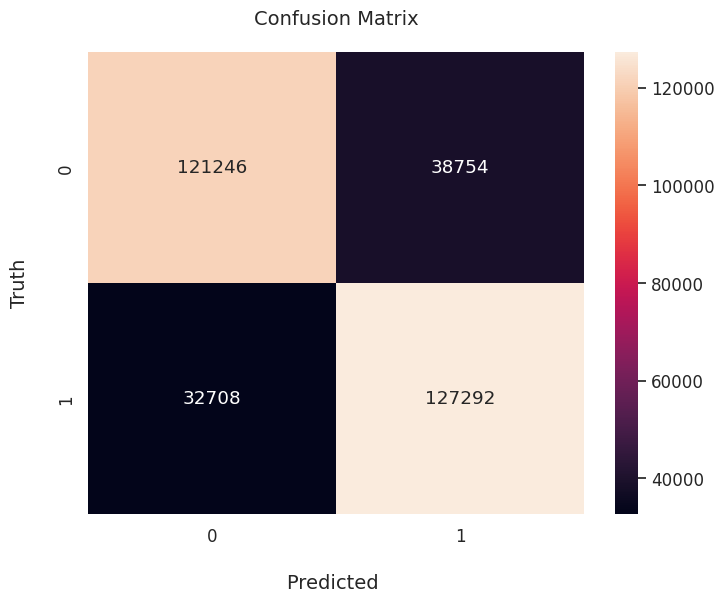

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have predictions (y_pred) and true labels (y_true)
conf_matrix = confusion_matrix(y_test, X_test_prediction)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)  # Scale up the size of all text

# Plot the confusion matrix using Seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='d')

# Customize axes labels
ax.set_xlabel("Predicted ", fontsize=14, labelpad=20)
ax.set_ylabel("Truth", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

# Show the plot
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [40]:
# random forest
from sklearn.ensemble import RandomForestClassifier
model_2= RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, min_samples_leaf=5)


In [41]:
model_2.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)

In [42]:
# accuracy score on the training data
X_train_prediction_1=model_2.predict(X_train)
training_data_accuracy_1=accuracy_score(y_train,X_train_prediction)

In [43]:
print('Accuracy score on the the training data :',training_data_accuracy_1)

Accuracy score on the the training data : 0.79871953125


In [44]:
# accuracy score on the test data
X_test_prediction_1=model_2.predict(X_test)
test_data_accuracy_1=accuracy_score(y_test,X_test_prediction)

In [45]:
print('Accuracy score on the the training data :',test_data_accuracy_1)

Accuracy score on the the training data : 0.77668125


In [51]:
import pickle
filename='twitter_sentiment_randfor.sav'
pickle.dump(model_2,open(filename,'wb'))

CONFUSION_MATRIX

AND CLASSIFICATION REPORT

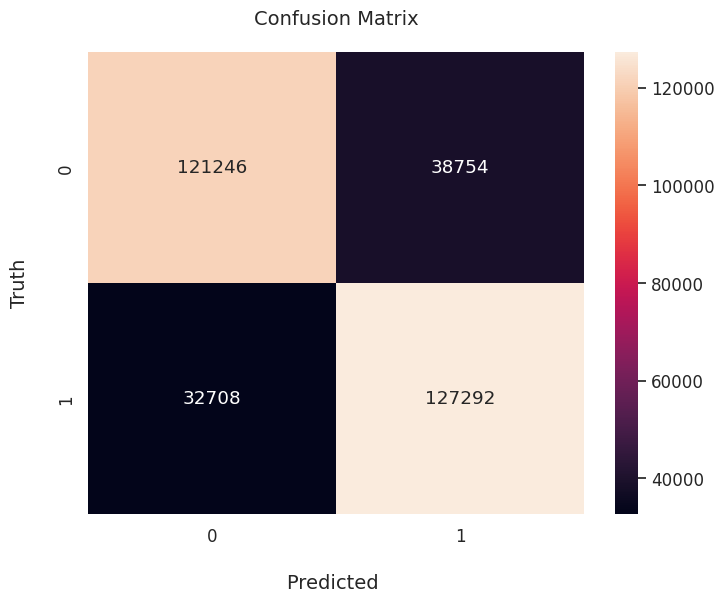

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have predictions (y_pred) and true labels (y_true)
conf_matrix = confusion_matrix(y_test, X_test_prediction)

# Set up the plot
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.1)  # Scale up the size of all text

# Plot the confusion matrix using Seaborn heatmap
ax = sns.heatmap(conf_matrix, annot=True, fmt='d')

# Customize axes labels
ax.set_xlabel("Predicted ", fontsize=14, labelpad=20)
ax.set_ylabel("Truth", fontsize=14, labelpad=20)
ax.set_title("Confusion Matrix", fontsize=14, pad=20)

# Show the plot
plt.show()

In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

           0       0.79      0.76      0.77    160000
           1       0.77      0.80      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



using the saved model for future predictions

In [54]:
X_new=X_test[3]
print(y_test[3])

prediction=model_1.predict(X_new)
print(prediction)

if(prediction[0]==0):
  print('Negative Tweet')

else:
  print('Positive Tweet')

0
[0]
Negative Tweet
